<a href="https://colab.research.google.com/github/Namrata-cse/Stock_prediction/blob/main/StockPred_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install quantrautil

In [42]:
# quantrautil will be used to fetch the price data of the BAC stock from yahoo finance.
import quantrautil as q
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import accuracy_score
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
#import the price data of BAC stock from quantrautil.
data = q.get_data('BAC','2000-1-1','2019-2-1')
# The get_data function from quantrautil is used to get the BAC data for 19 years from 1 Jan 2000 to 31 Jan 2019 


Exception in thread Thread-225:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/multitasking/__init__.py", line 104, in _run_via_pool
    return callee(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/fix_yahoo_finance/__init__.py", line 322, in _download_one_threaded
    period, interval, prepost)
  File "/usr/local/lib/python3.7/dist-packages/fix_yahoo_finance/__init__.py", line 333, in _download_one
    actions=actions, auto_adjust=auto_adjust)
  File "/usr/local/lib/python3.7/dist-packages/fix_yahoo_finance/__init__.py", line 239, in history
    data = data.json()
  File "/usr/local/lib/python3.7/dist-packages/requests/models.py", line 898, in json
    return complexjson.loads(self.text, **kwargs)
  File "/usr/lib/python3.7/json/__init__.py", li

In [21]:

data.tail()

,Open,High,Low,Close,Volume,Source
Date,,,,,,
2017-03-08,67.70,74.90,67.00,70.55,200493,nsepy
2017-03-09,70.05,74.45,69.25,72.40,97649,nsepy
2017-03-10,73.40,73.40,69.95,70.00,11007,nsepy
2017-03-14,73.00,82.00,70.05,80.90,643894,nsepy
2017-03-15,82.85,85.80,78.80,83.10,385258,nsepy


In [22]:
print(data.head())

             Open   High    Low  Close Volume Source
Date                                                
2000-01-03  17.25  18.70  15.30  18.35  88900  nsepy
2000-01-04  18.00  19.00  16.05  16.55  39900  nsepy
2000-01-05  14.50  17.50  14.50  17.05  14100  nsepy
2000-01-06  17.15  17.60  15.75  15.75  11750  nsepy
2000-01-07  15.00  15.75  15.00  15.75   2500  nsepy


In [31]:
#Creating input and output dataset
# Features construction 
data['Open-Close'] = (data.Open - data.Close)/data.Open
data['High-Low'] = (data.High - data.Low)/data.Low
data['percent_change'] = data['Close'].pct_change()
data['std_5'] = data['percent_change'].rolling(5).std()
data['ret_5'] = data['percent_change'].rolling(5).mean()
data.dropna(inplace=True)

In [33]:
# X is the input variable
X = data[['Open-Close', 'High-Low', 'std_5', 'ret_5']]

# Y is the target or output variable
y = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)

In [34]:
#Train Test Split
# Total dataset length
dataset_length = data.shape[0]

# Training dataset length
split = int(dataset_length * 0.75)
split

2890

In [35]:
# Splitiing the X and y into train and test datasets
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Print the size of the train and test dataset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2890, 4) (964, 4)
(2890,) (964,)


Training the machine learning model
All set with the data! Let's train a decision tree classifier model. The RandomForestClassifier function from tree is stored in variable ‘clf’ and then a fit method is called on it with ‘X_train’ and ‘y_train’ dataset as the parameters so that the classifier model can learn the relationship between input and output.
In [6]:

In [36]:
clf = RandomForestClassifier(random_state=5)

In [37]:
# Create the model on train dataset
model = clf.fit(X_train, y_train)

In [39]:
print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

Correct Prediction (%):  50.0


In [40]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

          -1       0.55      0.65      0.59       542
           1       0.41      0.31      0.35       422

    accuracy                           0.50       964
   macro avg       0.48      0.48      0.47       964
weighted avg       0.49      0.50      0.49       964



In [41]:
data['strategy_returns'] = data.percent_change.shift(-1) * model.predict(X)


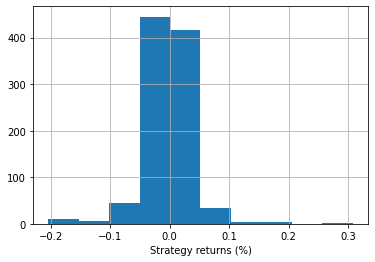

In [43]:
data.strategy_returns[split:].hist()
plt.xlabel('Strategy returns (%)')
plt.show()

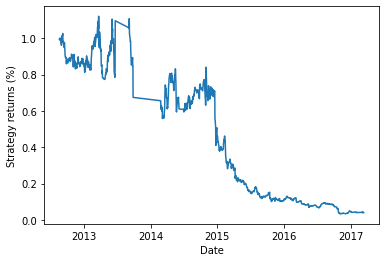

In [44]:
(data.strategy_returns[split:]+1).cumprod().plot()
plt.ylabel('Strategy returns (%)')
plt.show()